# Studi Kasus Dataset Credit Score (Tugas 8)

## Tahap Preprocessing Data

In [1]:
import numpy as np
from sklearn import preprocessing
import pandas as pd

In [2]:
dataset = pd.read_csv("https://raw.githubusercontent.com/AliGhufron-28/datamaining/main/credit_score1.csv")

In [3]:
dataset.head()

,Unnamed: 0,kode_kontrak,pendapatan_setahun_juta,kpr_aktif,durasi_pinjaman_bulan,jumlah_tanggungan,rata_rata_overdue,risk_rating
0,1,AGR-000001,295,YA,48,5,61 - 90 days,4
1,2,AGR-000011,271,YA,36,5,61 - 90 days,4
2,3,AGR-000030,159,TIDAK,12,0,0 - 30 days,1
3,4,AGR-000043,210,YA,12,3,46 - 60 days,3
4,5,AGR-000049,165,TIDAK,36,0,31 - 45 days,2


In [4]:
df_without_column_for_convert = pd.DataFrame(dataset, columns = ['kode_kontrak','pendapatan_setahun_juta','durasi_pinjaman_bulan','jumlah_tanggungan','risk_rating'])
df_without_column_for_convert.head()

,kode_kontrak,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan,risk_rating
0,AGR-000001,295,48,5,4
1,AGR-000011,271,36,5,4
2,AGR-000030,159,12,0,1
3,AGR-000043,210,12,3,3
4,AGR-000049,165,36,0,2


In [5]:
df_ratarata=pd.get_dummies(dataset['rata_rata_overdue'])
df_ratarata.head()

,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days
0,0,0,0,1,0
1,0,0,0,1,0
2,1,0,0,0,0
3,0,0,1,0,0
4,0,1,0,0,0


In [6]:
df_kpr_aktif=pd.get_dummies(dataset['kpr_aktif'])
df_kpr_aktif

,TIDAK,YA
0,0,1
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
895,0,1
896,0,1
897,1,0
898,1,0


In [7]:
df_new = pd.concat([df_without_column_for_convert, df_kpr_aktif,df_ratarata], axis=1)
df_new.head()

,kode_kontrak,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan,risk_rating,TIDAK,YA,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days
0,AGR-000001,295,48,5,4,0,1,0,0,0,1,0
1,AGR-000011,271,36,5,4,0,1,0,0,0,1,0
2,AGR-000030,159,12,0,1,1,0,1,0,0,0,0
3,AGR-000043,210,12,3,3,0,1,0,0,1,0,0
4,AGR-000049,165,36,0,2,1,0,0,1,0,0,0


In [8]:
df_risk_rating = pd.DataFrame(dataset, columns = ['risk_rating'])
df_risk_rating.head()

,risk_rating
0,4
1,4
2,1
3,3
4,2


In [9]:
df_without_risk_rating=df_new.drop(['risk_rating'], axis=1)

In [10]:
df_new2 = pd.concat([df_without_risk_rating,df_risk_rating], axis=1)
df_new2

,kode_kontrak,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan,TIDAK,YA,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days,risk_rating
0,AGR-000001,295,48,5,0,1,0,0,0,1,0,4
1,AGR-000011,271,36,5,0,1,0,0,0,1,0,4
2,AGR-000030,159,12,0,1,0,1,0,0,0,0,1
3,AGR-000043,210,12,3,0,1,0,0,1,0,0,3
4,AGR-000049,165,36,0,1,0,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
895,AGR-010739,112,48,5,0,1,0,0,0,0,1,5
896,AGR-010744,120,48,2,0,1,0,0,1,0,0,3
897,AGR-010758,166,24,2,1,0,1,0,0,0,0,1
898,AGR-010775,196,48,0,1,0,0,1,0,0,0,2


In [11]:
from sklearn.preprocessing import MinMaxScaler
df_for_minmax_scaler=pd.DataFrame(dataset, columns = ['pendapatan_setahun_juta','durasi_pinjaman_bulan','jumlah_tanggungan'])
df_for_minmax_scaler.to_numpy()
scaler = MinMaxScaler()
df_hasil_minmax_scaler=scaler.fit_transform(df_for_minmax_scaler)

In [12]:
df_hasil_minmax_scaler = pd.DataFrame(df_hasil_minmax_scaler,columns = ['pendapatan_setahun_juta','durasi_pinjaman_bulan','jumlah_tanggungan'])
df_hasil_minmax_scaler

,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan
0,0.978261,1.000000,0.833333
1,0.873913,0.666667,0.833333
2,0.386957,0.000000,0.000000
3,0.608696,0.000000,0.500000
4,0.413043,0.666667,0.000000
...,...,...,...
895,0.182609,1.000000,0.833333
896,0.217391,1.000000,0.333333
897,0.417391,0.333333,0.333333
898,0.547826,1.000000,0.000000


In [13]:
df_drop_column_for_minmaxscaler=df_new2.drop(['pendapatan_setahun_juta','durasi_pinjaman_bulan','jumlah_tanggungan'], axis=1)
df_drop_column_for_minmaxscaler

,kode_kontrak,TIDAK,YA,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days,risk_rating
0,AGR-000001,0,1,0,0,0,1,0,4
1,AGR-000011,0,1,0,0,0,1,0,4
2,AGR-000030,1,0,1,0,0,0,0,1
3,AGR-000043,0,1,0,0,1,0,0,3
4,AGR-000049,1,0,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...
895,AGR-010739,0,1,0,0,0,0,1,5
896,AGR-010744,0,1,0,0,1,0,0,3
897,AGR-010758,1,0,1,0,0,0,0,1
898,AGR-010775,1,0,0,1,0,0,0,2


In [14]:
df_new3 = pd.concat([df_drop_column_for_minmaxscaler,df_hasil_minmax_scaler], axis=1)
df_new3

,kode_kontrak,TIDAK,YA,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days,risk_rating,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan
0,AGR-000001,0,1,0,0,0,1,0,4,0.978261,1.000000,0.833333
1,AGR-000011,0,1,0,0,0,1,0,4,0.873913,0.666667,0.833333
2,AGR-000030,1,0,1,0,0,0,0,1,0.386957,0.000000,0.000000
3,AGR-000043,0,1,0,0,1,0,0,3,0.608696,0.000000,0.500000
4,AGR-000049,1,0,0,1,0,0,0,2,0.413043,0.666667,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
895,AGR-010739,0,1,0,0,0,0,1,5,0.182609,1.000000,0.833333
896,AGR-010744,0,1,0,0,1,0,0,3,0.217391,1.000000,0.333333
897,AGR-010758,1,0,1,0,0,0,0,1,0.417391,0.333333,0.333333
898,AGR-010775,1,0,0,1,0,0,0,2,0.547826,1.000000,0.000000


In [15]:
df_new3_without_risk_rating=df_new3.drop(['risk_rating'], axis=1)
df_new3_without_risk_rating

,kode_kontrak,TIDAK,YA,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan
0,AGR-000001,0,1,0,0,0,1,0,0.978261,1.000000,0.833333
1,AGR-000011,0,1,0,0,0,1,0,0.873913,0.666667,0.833333
2,AGR-000030,1,0,1,0,0,0,0,0.386957,0.000000,0.000000
3,AGR-000043,0,1,0,0,1,0,0,0.608696,0.000000,0.500000
4,AGR-000049,1,0,0,1,0,0,0,0.413043,0.666667,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
895,AGR-010739,0,1,0,0,0,0,1,0.182609,1.000000,0.833333
896,AGR-010744,0,1,0,0,1,0,0,0.217391,1.000000,0.333333
897,AGR-010758,1,0,1,0,0,0,0,0.417391,0.333333,0.333333
898,AGR-010775,1,0,0,1,0,0,0,0.547826,1.000000,0.000000


In [16]:
df_new4 = pd.concat([df_new3_without_risk_rating,df_risk_rating], axis=1)
df_new4

,kode_kontrak,TIDAK,YA,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan,risk_rating
0,AGR-000001,0,1,0,0,0,1,0,0.978261,1.000000,0.833333,4
1,AGR-000011,0,1,0,0,0,1,0,0.873913,0.666667,0.833333,4
2,AGR-000030,1,0,1,0,0,0,0,0.386957,0.000000,0.000000,1
3,AGR-000043,0,1,0,0,1,0,0,0.608696,0.000000,0.500000,3
4,AGR-000049,1,0,0,1,0,0,0,0.413043,0.666667,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...
895,AGR-010739,0,1,0,0,0,0,1,0.182609,1.000000,0.833333,5
896,AGR-010744,0,1,0,0,1,0,0,0.217391,1.000000,0.333333,3
897,AGR-010758,1,0,1,0,0,0,0,0.417391,0.333333,0.333333,1
898,AGR-010775,1,0,0,1,0,0,0,0.547826,1.000000,0.000000,2


## Naive Bayes 

In [17]:
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [18]:
X=df_new4.iloc[:,1:10].values
y=df_new4.iloc[:,11].values

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [20]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[69  0  0  0  0]
 [ 0 49  0  0  0]
 [ 0  0 84  0  0]
 [ 0  0  0 36  0]
 [ 0  0  0  0 32]]
accuracy_Naive Bayes: 1.000
precision_Naive Bayes: 1.000
recall_Naive Bayes: 1.000
f1-score_Naive Bayes : 1.000


## KNN Algorithm

In [21]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

acc_knn = round(neigh.score(X_train, y_train) * 100, 2)
print("Accuracy_KNN :",acc_knn)

Accuracy_KNN : 100.0


## Decision Tree

In [22]:
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import metrics
from matplotlib import pyplot as plt

In [23]:
# Menghitung akurasi dengan menggunakan gini indek
clf = tree.DecisionTreeClassifier(criterion="gini")
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [24]:
print("Accuracy_Decision Tree :",metrics.accuracy_score(y_test,y_pred))

Accuracy_Decision Tree : 1.0


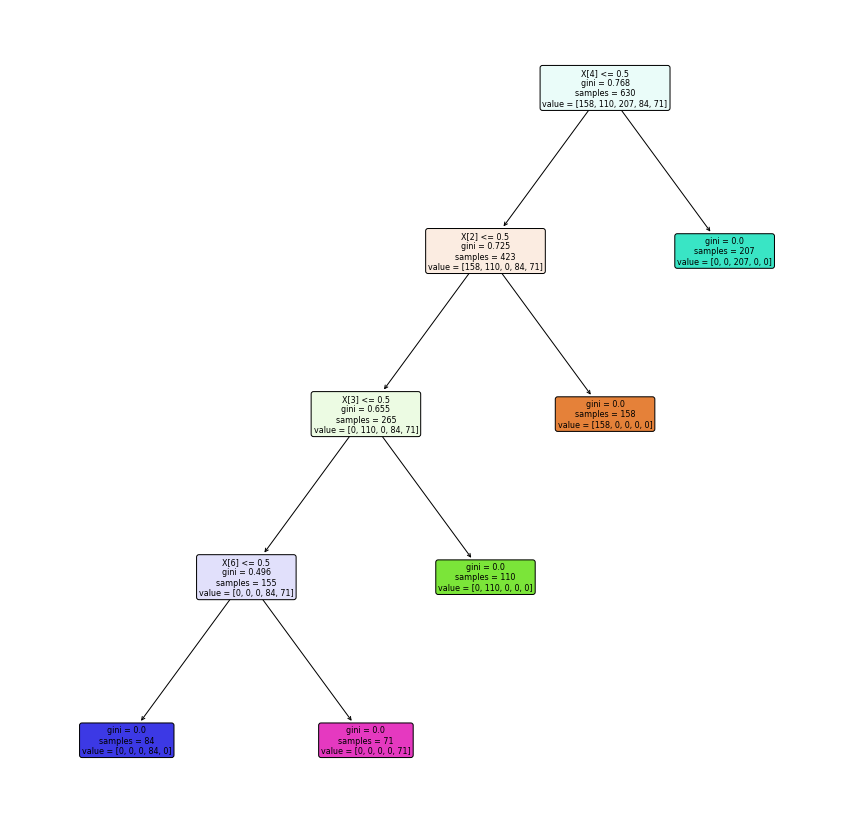

In [25]:
# gambar bentuk decision tree

plt.figure(figsize=(15,15))
#create the tree plot
a = tree.plot_tree(clf,
                   rounded = True,
                   filled = True,
                   fontsize=8)
#show the plot
plt.show()